# NN learning (tensorflow)

通过几种机器学习方法和MLP在线性不可分数据集上的分类来学习体会神经网络和深度学习

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)
tf.set_random_seed(1)

In [4]:
moon_data, moon_label = make_moons(200, noise=0.1)
print(moon_data.shape)

(200, 2)


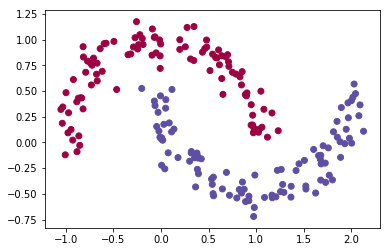

In [5]:
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label, cmap=plt.cm.Spectral)
plt.show()

可以看出该数据样本在二维平面中线性不可分

In [6]:
# 绘制决策等高图函数
def plot_decision_boundary(data, pred_func):
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    
#     x_min, x_max = moon_data[:, 0].min() - .5, moon_data[:, 0].max() + .5
#     y_min, y_max = moon_data[:, 1].min() - .5, moon_data[:, 1].max() + .5
    
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    label = pred_func(np.c_[xx.ravel(), yy.ravel()])
    label = label.reshape(xx.shape)
    plt.contourf(xx, yy, label, cmap=plt.cm.Spectral ) #
 

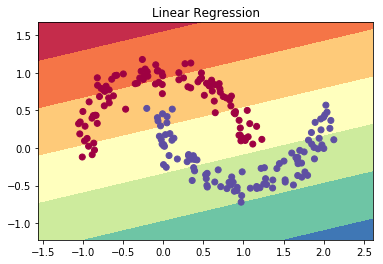

In [7]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(moon_data, moon_label)

plot_decision_boundary(moon_data, (lambda x: clf.predict(x)))
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label, cmap=plt.cm.Spectral)
plt.title("Linear Regression")
plt.show()

严格来讲，用线性回归做该样本的分类问题并不合适，但可以从决策区间的颜色可以得出该区域划分为哪种类型的概率大小。

### Logistic/Sigmoid 函数
sigmoid 函数$g(z)=1/(1+e^{-z})$ 这个函数的一个性质是: $$ {g}'(z)=g(z)(1-g(z)) $$

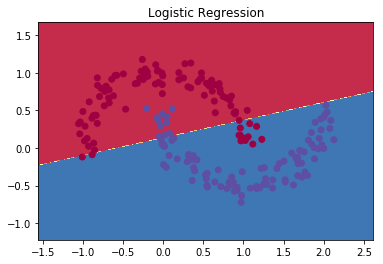

In [8]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
clf.fit(moon_data, moon_label)

plot_decision_boundary(moon_data, (lambda x: clf.predict(x)))
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label, cmap=plt.cm.Spectral)
plt.title("Logistic Regression")
plt.show()

机器学习中的线性分类器对于线性不可分样本集很难划分出可用的分界线。
sklearn.linear_model中还有很多线性模型，Lasso（L1）， Ridge（L2），等等。

$$
\theta  _{j}:= \theta_{j}+\alpha \sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))x^{(i)}_{j}
$$

SVM是统计学习的一种方法，通过核方法**(kernel method)** 在样本集中选择支持向量样本点，来实现最后的决策(超)平面。

In [9]:
from sklearn.svm import SVC #using SVM  as a classifier

In [10]:
model = 'linear'
sv = SVC(kernel=model)
sv.fit(moon_data, moon_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

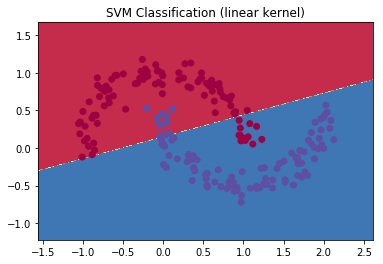

In [11]:
plot_decision_boundary(moon_data, (lambda x: sv.predict(x)))
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label, cmap=plt.cm.Spectral)
plt.title("SVM Classification (linear kernel)")
plt.show()

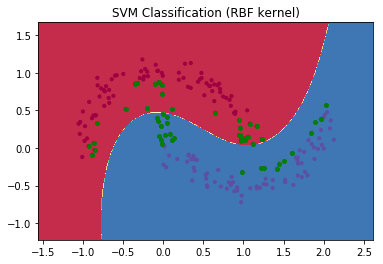

In [12]:
model = 'rbf'
sv = SVC(kernel=model)
sv.fit(moon_data, moon_label)
plot_decision_boundary(moon_data, (lambda x: sv.predict(x)))
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label,s=10, cmap=plt.cm.Spectral)
plt.scatter(sv.support_vectors_[:,0],sv.support_vectors_[:,1],c='g', s=15)
plt.title("SVM Classification (RBF kernel)")  # Guasis
plt.show()

上图为高斯核的SVM分类器的分类效果,图中绿色的点就是所谓的支持向量,而其他的样本点没有参与决策分类面的构建。

## 多层神经网络(MLP)

MLP：
反向传播(BP)的四个公式：
> Michael Nielsen, Neural Networks and Deep Learning[M],  section 2.4
$$\delta^{L}=\bigtriangledown_{a}C\odot{\sigma}'(z^{L})$$
$$\delta^{l}=((w^{l+1})^{T}\delta^{l+1}\odot{\sigma}'(z^{l})$$
$$\frac{\partial C}{\partial b^{l}_{j}}=\delta^{l}_{j}$$
$$\frac{\partial C}{\partial w^{l}_{jk}}=a^{l-1}_{k}\delta^{l}_{j}$$


对于简单的只有一层隐藏层的多层神经网络，能实现非线性分类器。应对本文的数据集，构建一个维度为2的输入层，3个节点的隐藏层，2个输出的输出层。对应前向传递函数为：
$$ a_{1}=tanh(W_{1}x_{1}+b_{1})$$
$$ \widehat{y}=a_{2}=softmax(W_{2}a_{1}+b_2)$$
其中$\widehat{y}$为神经元网络输出的预测值。
用交叉熵做为损失函数：

** -------------intention blank ---------**
$$L(y,\widehat{y})= -\frac{1}{N} \sum_{n\in N}\sum_{i\in C}y_{n,i}log\widehat{y}_{n,i} $$

则在在运算中一个epoch就是一次FP运算加一次BP运算

\|输入层 | 第一次_线性_变换 | 第一次_激活_变换 | 第二次_线性_变换 | \_激活\_输出\_预测值\_
-|-|-|-|-|-
FP公式|input $x_{1}$ |  $z_{1}=W_{1}x_{1}+b_{1}$ | $a_{1}=tanh(z_{1})$ | $z_{2}=W_{2}a_{1}+b_{2}$ | $a_{2}=softmax(z_{2})$
|||||
BP公式|-| $\frac{\partial{L}}{\partial{W_{1}}}=x^{T}\delta_{2}$ | $\delta_{2}=(1-tanh^{2}z_{1})\odot \delta_{3}W^{T}_{2}$ | $\frac{\partial{L}}{\partial{W_{2}}}=a_{1}^{T}\delta_{3}$ | $ \delta_{3}=\widehat{y}-y$
|| $\frac{\partial{L}}{\partial{b_{1}}}=\delta_{2}$ || $\frac{\partial{L}}{\partial{b_{2}}}=\delta_{3}$ |


对应反向传播的公式为：

In [46]:
num_examples = len(moon_data) 
nn_input_dim = 2 # (input dimention)
nn_output_dim = 2 # (one-vs-one）
 

learning_rate = 0.01 
regularization_lambda = 0.01

def calculate_loss(data, label, NetWork):
    W1, b1, W2, b2 = NetWork['W1'], NetWork['b1'], NetWork['W2'], NetWork['b2']
    # forward calculation
    z1 = data.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    # softmax(z2)
    exp_z2 = np.exp(z2)
    probs = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
    # calculate loss
    corect_logprobs = -np.log(probs[range(num_examples), label])
    data_loss = np.sum(corect_logprobs)
    # L2 regularization
    data_loss += regularization_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [47]:
def build_network(data, label, nn_hdim, num_epoch=1000, moniter_loss=False):
    
    #Initialize each weight using a Gaussian distribution with mean 0
    #and standard deviation 1 over the square root of the number of
    #weights connecting to the same neuron.
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)   
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    
    b1 = np.zeros((1, nn_hdim))
    b2 = np.zeros((1, nn_output_dim))
 
    network = {}
     
    for i in range(0, num_epoch):
 
        # FP calculation
        z1 = data.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
     
       
        # BP calculation
        delta3 = probs
        delta3[range(num_examples), label] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(data.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # lan Goodfellow, Deep learning[M]; seciton7.1
        # regular gradient decay
        dW2 += regularization_lambda  * W2
        dW1 += regularization_lambda  * W1
 
        # Update the network's weights and biases by applying GD 
        # using BP algorithm
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
         
        network = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # print loss if moniter is TRUE
        if  moniter_loss and i % 100 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(data, label, network)))
     
    return network

In [48]:
def predict(network, data):
    W1, b1, W2, b2 = network['W1'], network['b1'], network['W2'], network['b2']
    
    z1 = data.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_z2 = np.exp(z2)
    # 计算概率输出最大概率对应的类别
    probs = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Loss after iteration 0: 0.451681
Loss after iteration 100: 0.168453
Loss after iteration 200: 0.020063
Loss after iteration 300: 0.011756
Loss after iteration 400: 0.009205
Loss after iteration 500: 0.008018
Loss after iteration 600: 0.007350
Loss after iteration 700: 0.006930
Loss after iteration 800: 0.006648
Loss after iteration 900: 0.006449


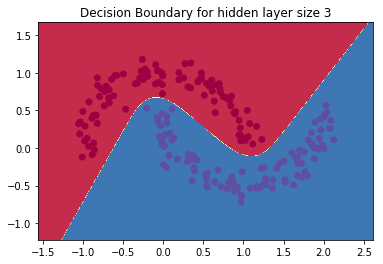

In [49]:
simple_network = build_network(moon_data, moon_label, 3, moniter_loss=True)
 
# 决策/判定边界
plot_decision_boundary(moon_data,(lambda x: predict(simple_network, x)))
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for hidden layer size 3")
plt.show()